In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import confusion_matrix,accuracy_score
from pprint import pprint 
from sklearn.naive_bayes import CategoricalNB
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
reduced_data=data[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Statistical_report', 'Result']]
reduced_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,-1,-1,0,-1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,1,-1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,-1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,1,-1,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,0,-1,-1,-1,1,1,-1,-1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,0,1,1,1,1,1,1,-1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,0,-1,1,1,1,1,1,-1,1,-1


In [4]:
for i in range(reduced_data.shape[0]):
    for j in range(reduced_data.shape[1]):
        if reduced_data.loc[i][j]==-1:
            reduced_data.loc[i][j]=2
reduced_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,...,0,1,1,1,2,2,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,...,0,1,1,1,2,2,0,2,1,2
2,1,0,1,1,1,2,2,2,2,1,...,0,1,1,1,1,2,1,2,2,2
3,1,0,1,1,1,2,2,2,1,1,...,0,1,1,1,2,2,1,2,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,...,0,2,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,2,...,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,0,1,1,1,1,1,1,2,1,2
11053,2,2,1,1,1,2,2,2,1,2,...,0,2,1,1,1,1,1,2,1,2


In [25]:
x=reduced_data.iloc[:,0:25]
y=reduced_data.iloc[:,25]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape,x_test.shape)

(8844, 25) (2211, 25)


In [28]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [29]:
import pickle
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
x_train_ohe=ohe.fit_transform(x_train)
x_test_ohe=ohe.transform(x_test)
pickle.dump(ohe,open('OHE','wb'))

In [42]:
kf=KFold(n_splits=4,shuffle=True,random_state=1000)

In [43]:
accuracyscores=[]
for train,val in kf.split(x_train):
    nb=CategoricalNB()
    nb=nb.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=confusion_matrix(y_train[val],nb.predict(x_train[val])).ravel()
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    accuracyscores.append((acc,precision,recall,fpr))
print(np.mean(accuracyscores,axis=0))

[0.92819991 0.92411643 0.94862617 0.09703477]


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)
y_pred=model.predict(x_test)
pred_prob=model.predict_proba(x_test)

In [45]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1)

0.964182726326743


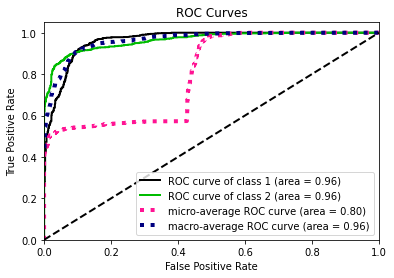

In [46]:
import scikitplot
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
fnn=KNeighborsClassifier()
param_grid={
    "n_neighbors":[3,5,7,9,11,13,15],
    "metric":['euclidean','manhattan']
}
gs=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
results=gs.fit(x_train_ohe,y_train)
results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [ ]:
accuracy_scoresknn.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scoresknn,axis=0))

In [67]:
def cal_metric(tp,fn,fp,tn):
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    return str(acc)+' '+str(precision)+' '+str(recall)+' '+str(fpr)

In [74]:
for train,result in kf.split(x_train):
    modelknn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
    modelknn=modelknn.fit(x_train_ohe[train],y_train[train])
    tp,fn,fp,tn=metrics.confusion_matrix(y_train[val],modelknn.predict(x_train_ohe[val])).ravel()
    accuracy=(tn+tp)/(tn+tp+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fpr=fp/(fp+tn)
    accuracy_scoresknn.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scoresknn,axis=0))

[0.96732248 0.96566838 0.97601626 0.04357798]


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
d=DecisionTreeClassifier(random_state=10)
param={
    "max_depth":range(1,20),"random_state": [10]
}
gs=GridSearchCV(estimator=d,param_grid=param)
gs=gs.fit(x_train,y_train)
print(gs.best_params_)

{'max_depth': 19, 'random_state': 10}


In [75]:
accuracy_scoresd=[]
for train,val in kf.split(x_train):
    d=DecisionTreeClassifier(random_state=10,max_depth=19)
    d=d.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=metrics.confusion_matrix(y_train[val],d.predict(x_train[val])).ravel()
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    accuracy_scoresd.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scoresd,axis=0))
    

[0.95024876 0.95376572 0.96404024 0.05806779]


In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_features='sqrt',n_estimators=50,oob_score=True)
param={
    'n_estimators':[200,500,700,1000],
    'max_features':['auto','sqrt','log2']
}
gs_rf=GridSearchCV(estimator=rf,param_grid=param,cv=10)
gs_rf.fit(x_train,y_train)
print(gs_rf.best_params_)

{'max_features': 'log2', 'n_estimators': 1000}


In [92]:
accuracy_scores_rf=[]
for train,val in kf.split(x_train):
    model_rf=RandomForestClassifier(max_features='log2',n_estimators=1000)
    model_rf=model_rf.fit(x_train_ohe[train],y_train[train])
    tp,fn,fp,tn=metrics.confusion_matrix(y_train[val],model_rf.predict(x_train_ohe[val])).ravel()
    accuracy=(tn+tp)/(tn+tp+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fpr=fp/(fp+tn)
    accuracy_scores_rf.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scores_rf,axis=0))

[0.96551334 0.96408779 0.9740743  0.04528246]


In [81]:
svmclf=svm.SVC()
param={
    'C':[0.1,0.01,1,10,100],
    'gamma':[0.1,0.01,1,0.001],
    'kernel':['rbf','linear']
}
gs_svm=GridSearchCV(svm.SVC(),param_grid=param,cv=10)
gs_svm=gs_svm.fit(x_train_ohe,y_train)
print(gs_svm.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [106]:
accuracy_scores_svm=[]
for train,val in kf.split(x_train_ohe):
    model_svm=svm.SVC(kernel='rbf',gamma=0.1,C=10,probability=True)
    model_svm=model_svm.fit(x_train_ohe[train],y_train[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train[val],model_svm.predict(x_train_ohe[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    accuracy_scores_svm.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scores_svm,axis=0))

[0.96065129 0.96200708 0.96727284 0.04738514]


In [107]:
pickle.dump(model_svm,open("SVM",'wb'))

In [108]:
filename_dt = 'SVM'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_train, loaded_model.predict(x_train_ohe)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9755766621438263
0.978601997146933
0.028194056388112777


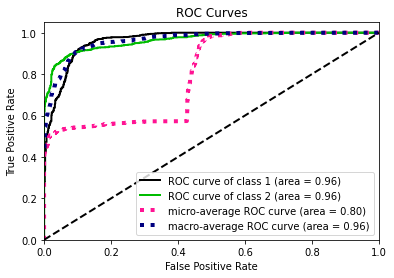

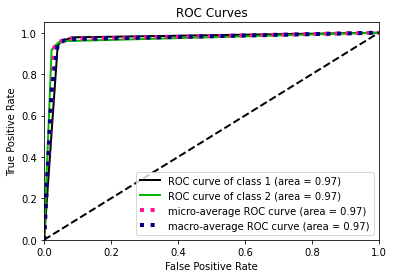

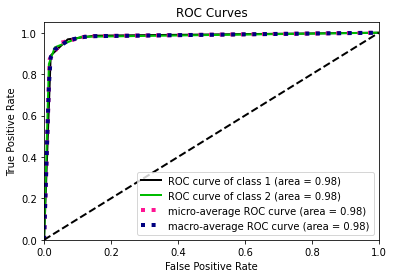

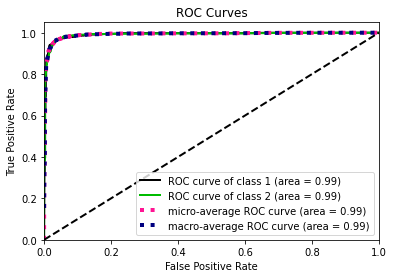

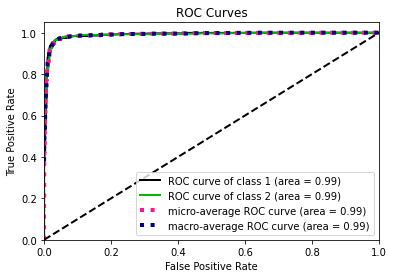

In [115]:
import scikitplot
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=d.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
x_test1=ohe.transform(x_test)
y_probas=modelknn.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=model_rf.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=model_svm.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.show()